# Introduction to Pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

Their official website for more details : https://pandas.pydata.org/

Now, we will learn:

* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Data Input and Output

## Installation 


    conda install pandas
or
    
    pip install pandas
    

# Series

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [1]:
import numpy as np
import pandas as pd

In [8]:
# You can convert a list,numpy array, or dictionary to a Series

labels = ['a','b','c']
# list
my_list = [10,20,30]

print(pd.Series(data=my_list))
print('\nWith labels ')
print(pd.Series(data=my_list,index=labels))

0    10
1    20
2    30
dtype: int64

With labels 
a    10
b    20
c    30
dtype: int64


In [9]:
# array
arr = np.array([10,20,30])
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

In [10]:
# dict
d = {'a':10,'b':20,'c':30}
pd.Series(d)

a    10
b    20
c    30
dtype: int64

> # Task #1
Create a Series using list.

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [13]:
idx = ['a', 'b', 'c', 'd', 'e']
cols = ['c1', 'c2', 'c3', 'c4', 'c5']

# 5x5 matices
data_array = np.random.randint(1,100,(5,5))

df = pd.DataFrame(data=data_array, index=idx, columns=cols)
df

,c1,c2,c3,c4,c5
a,53,15,98,17,1
b,46,58,48,27,93
c,1,2,85,24,1
d,12,50,84,70,18
e,48,37,5,64,53


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c1      5 non-null      int32
 1   c2      5 non-null      int32
 2   c3      5 non-null      int32
 3   c4      5 non-null      int32
 4   c5      5 non-null      int32
dtypes: int32(5)
memory usage: 140.0+ bytes


In [15]:
df.describe()

,c1,c2,c3,c4,c5
count,5.000000,5.00000,5.00000,5.000000,5.000000
mean,32.000000,32.40000,64.00000,40.400000,33.200000
std,23.738155,23.52233,37.86159,24.643458,39.600505
min,1.000000,2.00000,5.00000,17.000000,1.000000
25%,12.000000,15.00000,48.00000,24.000000,1.000000
50%,46.000000,37.00000,84.00000,27.000000,18.000000
75%,48.000000,50.00000,85.00000,64.000000,53.000000
max,53.000000,58.00000,98.00000,70.000000,93.000000


In [17]:
df

,c1,c2,c3,c4,c5
a,53,15,98,17,1
b,46,58,48,27,93
c,1,2,85,24,1
d,12,50,84,70,18
e,48,37,5,64,53


In [19]:
df['c1']

a    53
b    46
c     1
d    12
e    48
Name: c1, dtype: int32

In [20]:
type(df['c1'])

pandas.core.series.Series

In [25]:
# conditional selection
df[df['c1'] > 12]

,c1,c2,c3,c4,c5
a,53,15,98,17,1
b,46,58,48,27,93
e,48,37,5,64,53


In [26]:
# drop/remove row
df.drop('e',axis=0)

,c1,c2,c3,c4,c5
a,53,15,98,17,1
b,46,58,48,27,93
c,1,2,85,24,1
d,12,50,84,70,18


In [27]:
# drop/remove column
df.drop('c5',axis=1)

,c1,c2,c3,c4
a,53,15,98,17
b,46,58,48,27
c,1,2,85,24
d,12,50,84,70
e,48,37,5,64


> # Task #2
Show all data from `df` where `df['c2']<40`

# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [31]:
df_missing = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

df_missing

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [33]:
# remove all missing values in rows
df_missing.dropna()

,A,B,C
0,1.0,5.0,1


In [34]:
# remove all columns with missing values
df_missing.dropna(axis=1)

,C
0,1
1,2
2,3


In [36]:
# remove row with 2 missing values
df_missing.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [38]:
# replace/fill missing value with 0
df_missing.fillna(value=0)

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,0.0,0.0,3


># Task #3
Fill missing values of `df_missing` with `100` 
 
# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [57]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Amy','Sarah'],
       'Sales':[200,120,340,124,243,350]}

df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Amy,243
5,FB,Sarah,350


In [58]:
df.groupby('Company').min()

,Person,Sales
Company,,
FB,Amy,243
GOOG,Charlie,120
MSFT,Amy,124


In [59]:
df.groupby('Company')['Sales'].min()

Company
FB      243
GOOG    120
MSFT    124
Name: Sales, dtype: int64

In [60]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [61]:
df.groupby('Company')['Sales'].max()

Company
FB      350
GOOG    200
MSFT    340
Name: Sales, dtype: int64

In [62]:
df.groupby('Company').std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [65]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


> # Task #4
Groupby `df` using `Person` column with `count` function

# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating.

In [66]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

- ## Concatenation
Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [67]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [68]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [71]:
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


- ## Merging
The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [75]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [77]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


In [78]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [76]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


- ## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [80]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])


In [81]:
left 

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [82]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [83]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


> # Task #5
Concatenation of `df1`,`df2`,`df3`

# Data Input and Output

Pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [85]:
# read CSV
df = pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [86]:
df.to_csv('output.csv',index=False)

**Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash.**

In [91]:
# excel
df = pd.read_excel('Excel_Sample.xlsx', sheet_name='Sheet1')
df

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [96]:
df.to_excel('output.xlsx',sheet_name='Sheet1')

> # Task #6
Save `df3` as a CSV file

# Matplotlib  

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` :

In [97]:
import matplotlib.pyplot as plt

In [98]:
# You'll also need to use this line to see plots in the notebook:
%matplotlib inline

- ## Line chart

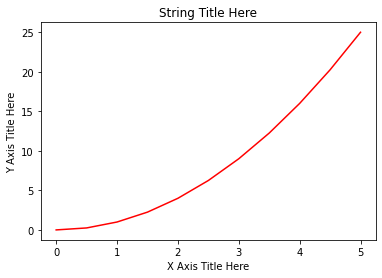

In [99]:
# line chart
x = np.linspace(0, 5, 11)
y = x ** 2

plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

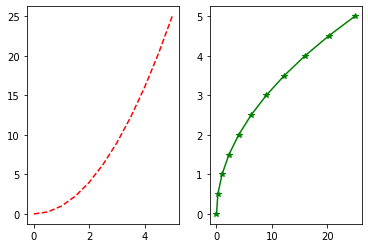

In [104]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

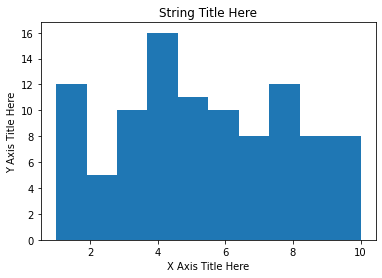

In [147]:
# histogram
data = np.random.randint(1, 11, 100) #will be used for task #7
plt.hist(data)
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

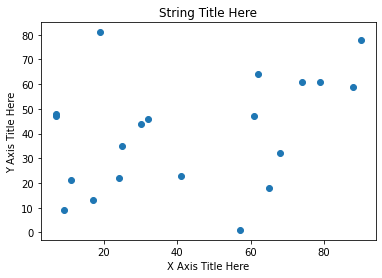

In [119]:
x = np.random.randint(1, 100, 20)
y = np.random.randint(1, 100, 20)

plt.scatter(x,y)
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

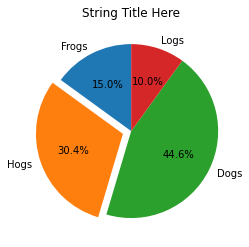

In [146]:
# pie chart 
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30.4, 44.6, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('String Title Here')
plt.show()

># Task #7
plot histogram of `data`